In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets

iris = datasets.load_iris()

df_iris = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df_iris['species'] = iris['target']

titanic =  sns.load_dataset('titanic') 
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


1. Pourcentage des personnes ayant survécu...

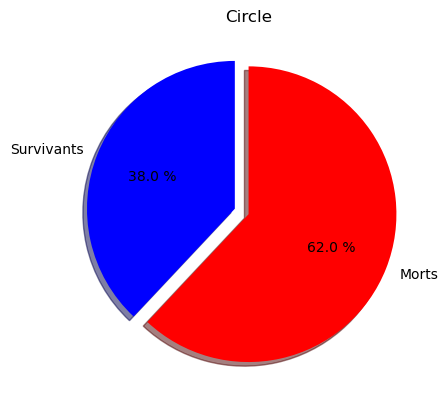

In [7]:
TOTAL = len(titanic)
mask =  (titanic['survived'] == 1)
survived =  round( mask.sum()/TOTAL, 2 ) * 100
dead = 100 - survived

colors = ['blue', 'red']
x = [survived, dead]

labels = 'Survivants', 'Morts'
explode = (0.1, 0)  

plt.pie(x, explode=explode, labels=labels, autopct='%.1f %%',
        shadow=True, startangle=90, colors=colors)
plt.title('Circle');

2.1 Répartition des survivants et non survivants en fonction de l'âge et de la classe...

<AxesSubplot:xlabel='survived', ylabel='age'>

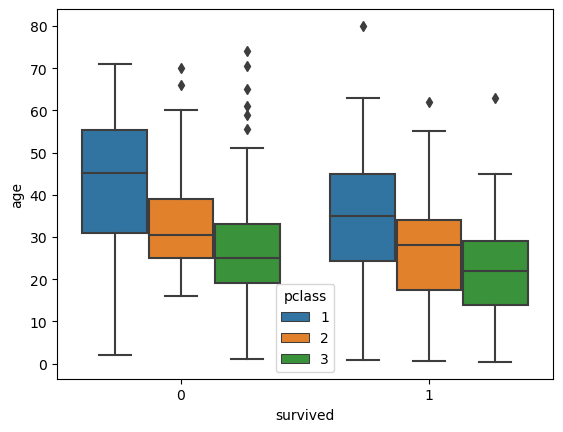

In [8]:
sns.boxplot(x='survived', y='age', hue='pclass',  data=titanic)


2.2 Répartition des survivants et non survivants en fonction de l'âge et du sexe...

<AxesSubplot:xlabel='survived', ylabel='age'>

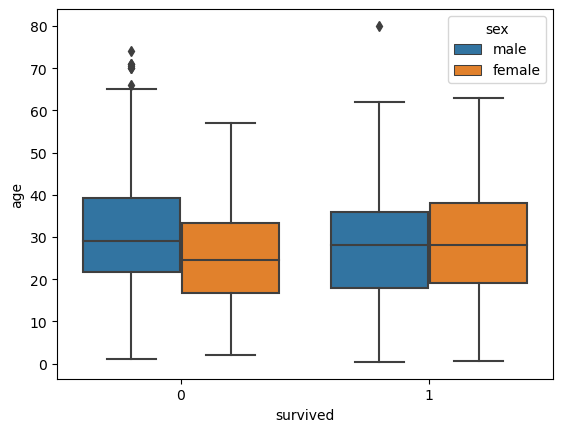

In [9]:
sns.boxplot(x='survived', y='age', hue="sex",  data=titanic)


2.3 Répartition des survivants et non survivants en fonction de l'âge du sexe et de la classe...

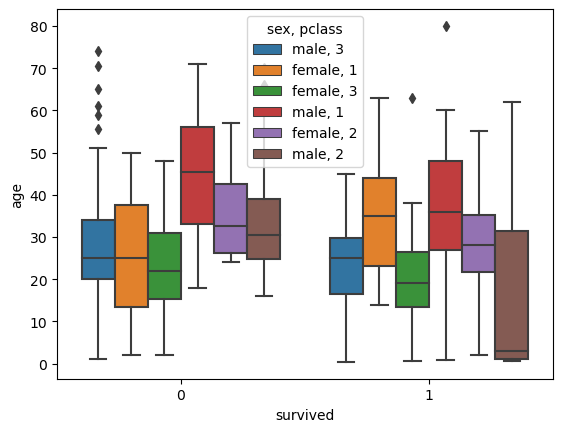

In [10]:
hue = titanic[['sex', 'pclass']].apply(
    lambda row: f"{row.sex}, {row.pclass}", axis=1)
hue.name = 'sex, pclass'
sns.boxplot(x='survived', y='age', hue=hue, data=titanic);

3. Mise en évidence des dispersions des sépales et pétales du dataset 'Iris' en fonction de la largeur puis de la longueur avec un diagramme en moustache


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


<AxesSubplot:xlabel='species', ylabel='sepal width (cm)'>

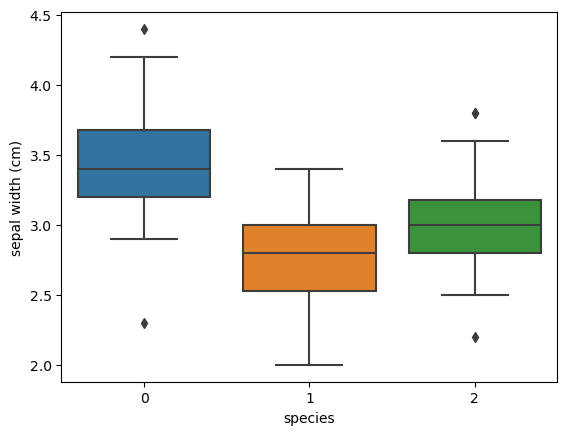

In [11]:
#Largeur des sépales pour tous les iris
df_iris.info()
sns.boxplot(x='species', y='sepal width (cm)', data=df_iris)

<AxesSubplot:xlabel='species', ylabel='sepal length (cm)'>

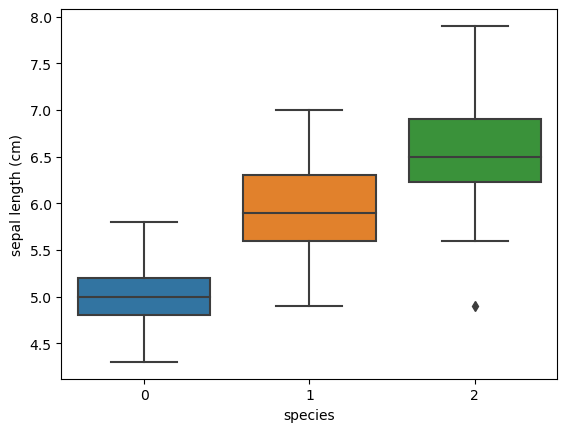

In [12]:
#Longeur des sépales pour tous les iris
sns.boxplot(x='species', y='sepal length (cm)', data=df_iris)

<AxesSubplot:xlabel='species', ylabel='petal width (cm)'>

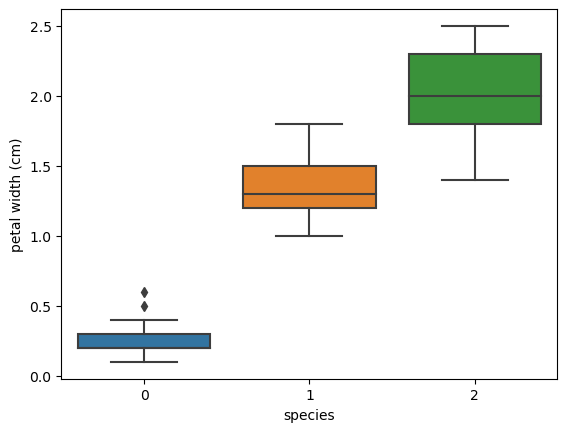

In [13]:
#Largeur des pétales pour tous les iris
sns.boxplot(x='species', y='petal width (cm)', data=df_iris)

<AxesSubplot:xlabel='species', ylabel='petal length (cm)'>

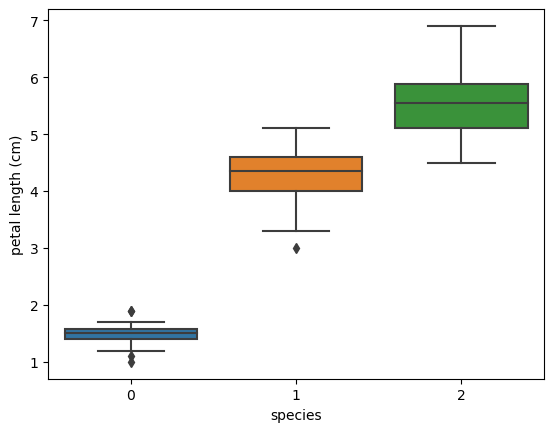

In [14]:
#Longeur des pétales pour tous les iris
sns.boxplot(x='species', y='petal length (cm)', data=df_iris)

<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>

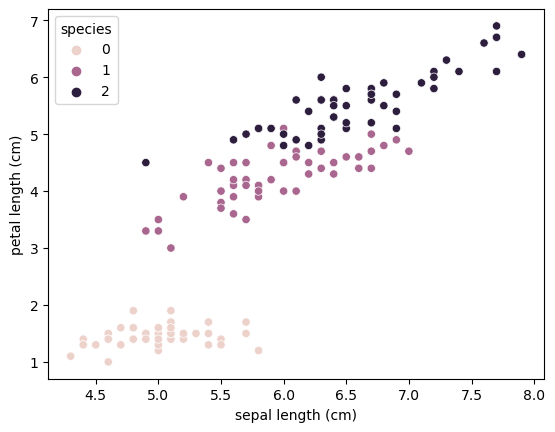

In [15]:
#comparaison des longeurs des sépales et des petales
sns.scatterplot(x='sepal length (cm)', y='petal length (cm)', hue='species', data=df_iris, )

<AxesSubplot:xlabel='sepal width (cm)', ylabel='petal width (cm)'>

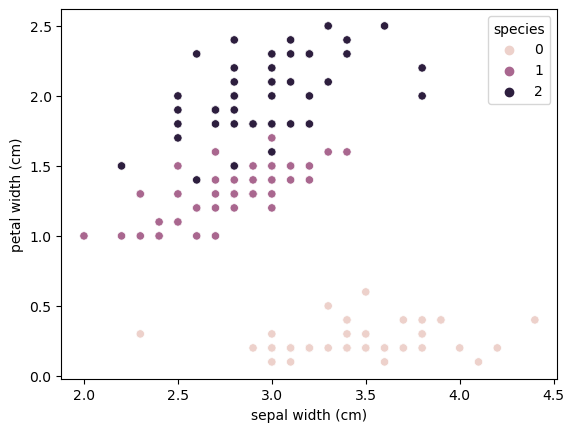

In [195]:
#comparaison des largeurs des sépales et des petales
sns.scatterplot(x='sepal width (cm)', y='petal width (cm)', hue='species', data=df_iris, )

<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

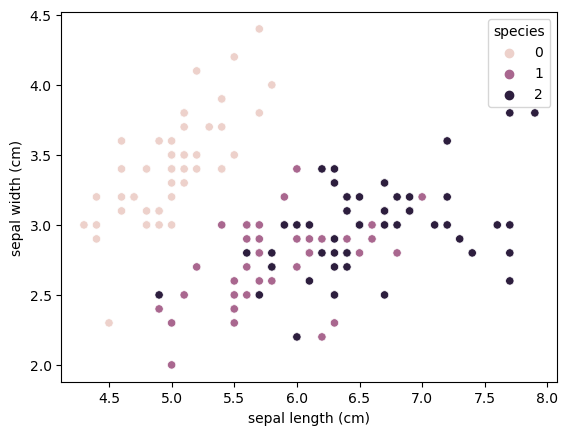

In [196]:
#comparaison des longeurs et les largeurs des sépales
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='species', data=df_iris, )

<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

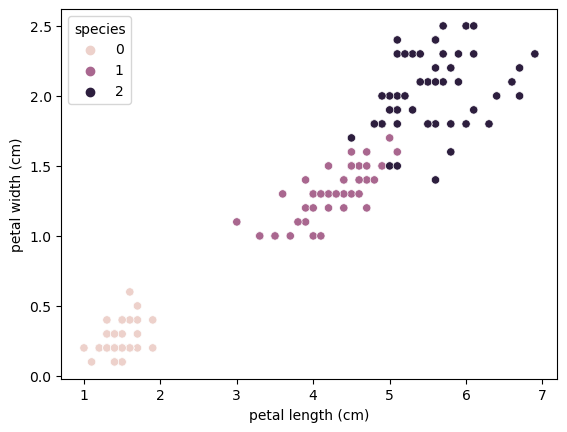

In [16]:
#comparaison des longeurs et les largeurs des petales
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='species', data=df_iris,)

## Etude d'un autre dataset

In [198]:
#Recupération des datasets seaborn disponibles
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [199]:
#choix du dataset crash à étudier
crashes =  sns.load_dataset('car_crashes')
crashes.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [200]:
data_alcohol = crashes.sort_values(by='alcohol', ascending=False)
data_alcohol = data_alcohol.head(10)

data_speeding = crashes.sort_values(by='speeding', ascending=False)
data_speeding = data_speeding.head(10)

Text(0.5, 1.0, 'top 10 des états qui ont à cause de conducteur ivres')

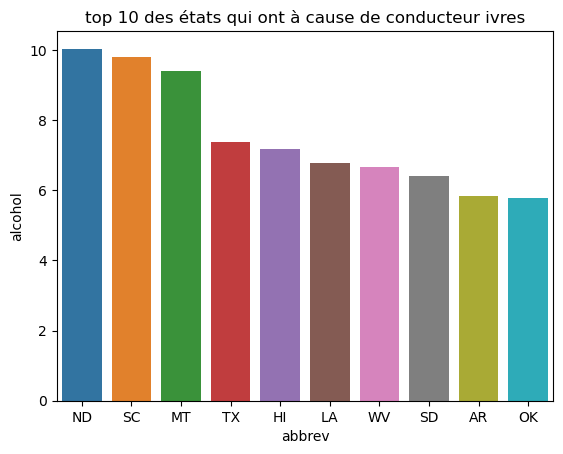

In [201]:
g1 = sns.barplot(x = 'abbrev', y='alcohol',  data=data_alcohol)
g1.set_title('top 10 des états US qui ont connu des accidents à cause de conducteur ivres')

Text(0.5, 1.0, 'top 10 des états qui ont connu des accidents à cause de conducteur qui filaient trop')

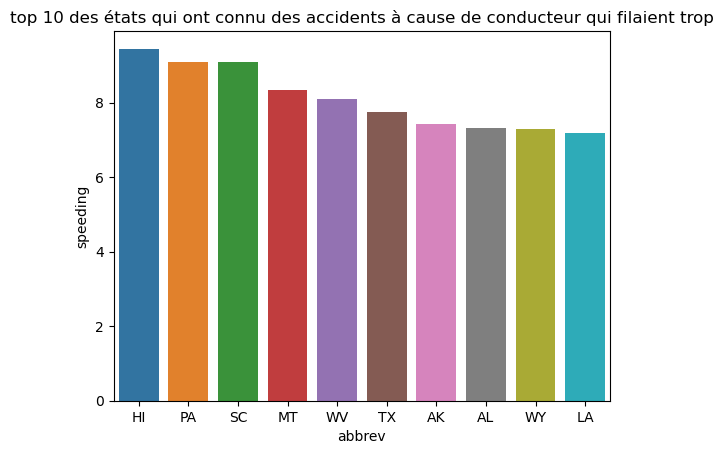

In [202]:
g2 = sns.barplot(x = 'abbrev', y='speeding',  data=data_speeding)
g2.set_title('top 10 des états US qui ont connu des accidents à cause de conducteur qui filaient trop')